In [1]:
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("ggplot")

%load_ext jupyter_black
%reload_ext autoreload 
%autoreload 2

In [2]:
import functions.grouping

# Readme from the NZ covid data github

https://github.com/minhealthnz/nz-covid-data

## Notes:

Numbers include all records entered as at 2023-05-02 11:59PM

Date extracted 2023-05-03

Data is based on records entered into CIR as at the time of data upload

DHB of residence is based on the primary residential address MoH has for
the individual mapped to the DHB zones.

DHB of Residence being Overseas and Undefined is a grouped category that
includes all those that normally reside overseas as well as those where
we do not have a residential address on record

Other sites refers to nationally led programmes, e.g. NZDF, NZPolice, St
John etc.

Where a number is less than 5, the record is suppressed to protect
individual privacy, as a result, totals of individual records may not
sum to gross figures.

## Files:

### "cumulative\_planned\_administered\_stock"

-   The information provided in the vaccinations planned column is based
    on DHB plans.
-   The last week of actuals is a partial week.
-   There will be no production plans from 30 August to 3 October. The
    increased vaccination demand caused by the August 2021 outbreak
    means the plans collected earlier do not provide a good comparator.

### "dhb\_plan"

-   The information provided in this table is based on DHB plans. We
    anticipate that there could be a potential variance of up to ten
    percent (plus or minus) in actual vaccination numbers. This is on
    the basis that, for example, an unplanned significant event could
    affect roll-out implementation or some DHBs might exceed their
    planned vaccination numbers.
-   There will be no production plans from 30 August to 3 October. The
    increased vaccination demand caused by the August 2021 outbreak
    means the plans collected earlier do not provide a good comparator.

### "dhb\_plan\_variance"

-   There will be no production plans from 30 August to 3 October. The
    increased vaccination demand caused by the August 2021 outbreak
    means the plans collected earlier do not provide a good comparator.

### "dhb\_residence\_uptake"

-   DHB of residence refers to the DHB where the individual resides, not
    the DHB where the vaccination was administered.
-   Where a number is less than 5, the record is suppressed to protect
    individual privacy, as a result, totals of individual records may
    not sum to gross figures.
-   The uptake statistics are provided as examples of how to calculate
    uptake. It is not recommended to use detailed uptake statistics for
    analysis because small variations will lead to very high or low
    uptakes with a small denominator. Detailed data is provided here to
    allow aggregations to be done across various dimensions.

### "workforce"

-   The figures are cumulative.
-   Previously, the active vaccinators number was reported as number
    active for a given week.

### "doses\_group\_and\_dhb\_service"

-   DHB of service refers to the DHB where the vaccination was
    administered, not the DHB where the individual resides.
-   Where a number is less than 5, the record is suppressed to protect
    individual privacy, as a result, totals of individual records may
    not sum to gross figures.
-   Groups:

Group 1:

-   Border Workers and their Household Contacts

Group 2:

-   Frontline health workers. Emergency Response Services.
-   Residential Facility Worker or Resident, Unknown, Other, Early
    Vaccine Access.
-   Individuals vaccinated at NZDF sites who identify as Border Workers
    or Household contacts.
-   Individuals over 65 and with underlying health conditions in
    Counties Manukau.

Group 3:

-   People at greatest risk of serious illness which includes over 65s
    and those with underlying health conditions. Health and social
    services.

Group 4:

-   General population.
-   Group 4 has not officially commenced however a number of sites are
    using group 4 to minimise wastage and vaccinate whanau who attend
    with group 3 individuals.
-   There also may be instances of vaccinators are entering group 4 into
    the system as the case reason when the person is eligible for group
    3.

Groups 1 and 2 are based primarily on employment role. Reliable and up
to date statistical information does not exist for this grouping so a
population size cannot be provided.

Group 3 eligibility can be met through age or through a number of
eligible health conditions and disabilities. A complete dataset of the
population with relevant conditions is not available with the level of
detail and quality required to define the population accurately.

### "vaccine\_for\_distribution"

-   Vaccine available for distribution is stock (in doses) held at
    central warehouses.
-   It does not include stock in transit or available at sites ready for
    use.

### "tla"

Population is based on the population reported as being in the TLA at
the time the HSU population was created for reporting purposes (mid 2020
for numbers, December 2020 for address)

Vaccinations data will include individuals that are now 12 years and
older, that were not included in the original HSU population, but are
eligible to be vaccinated now TLA2018 boundaries do not map cleanly to
the DHB boundaries, meaning that the population numbers for all of NZ
are correct, but aggregating to a DHB level will get a different number
to that published Vaccinations are based on the TLA of residence at the
time of vaccination and again the numbers will not match exactly to the
DHB numbers previously published Data is extracted and aggregated to
allow for comparison of vaccinations to population at a TLA level and
may not be suitable for any other purpose The Ministry kindly requests
that before publishing anything based on this data, that you allow the
Ministry to review the messaging and numbers in case of any errors in
the data Data is aggregated and whilst all care is taken to maintain
accuracy, there may be some minor errors that should not impact on
overall percentages

Note this does not include any vaccinations of individuals that are not
NZ residing.

### "sa2"

This page provides information related to uptake rates of the COVID-19
vaccine across the country. Data are provided showing vaccination
records aggregated by area of residence.

The areas have been determined based on the standard SA2 definition from
Statistics NZ.

Population (denominator data) is based on the Health Service User data
set, and is sourced from NHI records held by the Ministry of Health.  
For the purposes of these maps, this denominator data set has been
updated with the most up to date place of residence and as a result will
differ slightly from the published HSU at disaggregated levels.

Data has been masked at high levels of uptake due to the potential for
personally identifiable information to be derived. Rows with populations
of less than 40 people have also been removed for privacy reasons.

### "sa2\_maori"

This view has been filtered to contain only Maori and Pacific People for
SA2 defined above (See sa2 above.)

### "hsu\_population"

-   DHB of residence refers to the DHB where the individual resides, not
    the DHB where the vaccination was administered .
-   Where a number is less than 5, the record is suppressed to protect
    individual privacy, as a result, totals of individual records may
    not sum to gross figures. These values have been summed into a
    single row with the header "Various"

**The Health Service User (HSU) population and COVID-19 vaccine coverage
reporting**

The Health Service User population estimate counts the number of people
who received health services in a given year. Someone is counted in the
population if their associated National Health Index (NHI) number
received public health services; or was enrolled with a primary health
organisation (PHO).

**Information on the HSU 2020 used for COVID-19 vaccine coverage
reporting**

-   The HSU population estimate was generated from data on 5th July 2021
    and captures health service users in the 2020 calendar year.
-   The HSU population estimate uses 1 July 2020 to set age, and anyone
    who died prior to 1st July 2020 is excluded from the population,
    while anyone who has died from 1 July onwards is included.
-   DHB of domicile was captured on 31 December 2020 as the latest
    address information we have for the individual.
-   Ethnicity and gender information comes from the NHI status at 5th
    July 2021.
-   Children under the age of 12 years have been excluded from the
    count, as there is currently no approval to vaccinate these ages.
-   Ethnicity is prioritised in the order: Māori, Pacific, Asian,
    European or Other, Unknown
-   Approximately 3-4% of people included in the HSU were not enrolled
    with a PHO but had a record of health service use.

**Benefits of the HSU**

**Preventing numerator denominator bias.** To monitor COVID-19 vaccine
coverage, the HSU is being used as a health-specific population
denominator. The HSU ensures the same source of demographic information
is used in the numerator and the denominator. This combats numerator
denominator bias. There are some drawbacks to this (see below), but the
HSU will provide the most accurate analysis of vaccine coverage by
ethnicity and location.

**Analysis of uptake by ethnicity.** The ethnicity with which someone
identifies in the Census is not always the same as their ethnicity as
recorded in health data: approximately 15-20% of people who
self-identified as Māori or Pacific in the 2018 Census were not recorded
as Māori or Pacific in NHI data in 2020. This means that when using
Census-based estimates (eg Stats NZ population estimates or projections)
as the population denominator, and health data as the numerator,
mismatches in ethnicity occur. For vaccine uptake monitoring purposes,
this would mean the ethnic specific vaccine uptake rates would be
incorrect.

**Analysis of uptake by location.** When using the HSU the source of
health service users' address information, from which location
information is derived, is also the same in the numerator and the
denominator. This allows for more accurate and flexible analysis of
coverage by geography. From a vaccine perspective, this is very helpful
in assisting DHBs and PHOs to monitor the populations for which they are
responsible. It also enables the identification of potential geographic
clusters with low vaccine coverage.

**Available for a wide range of sub-populations.** As the HSU is based
on health data, it can be aggregated by any variable held in health
data. For example, prioritised or total response ethnicity at level 1 or
level 2; a range of geographic areas including domicile code, TLA, and
meshblock; NZDep quintile or decile. Other National-level population
estimates have a more limited range of demographic variables included,
reducing their usefulness for vaccine coverage monitoring of various
sub-populations.

**Limitations of the HSU**

**The HSU does not include everyone in New Zealand.** By definition, the
HSU *is not a total population estimate*: it includes people who
received health services or were PHO enrolled in a given year. This does
not cover everyone in New Zealand. The HSU is likely to miss highly
marginalised groups. Also, the datasets used to create the HSU are not
always complete, for example we do not receive complete reporting of all
private hospital events in New Zealand.

This means that some groups are underrepresented in the HSU. Analysis
done in the Integrated Data Infrastructure (IDI) suggests that groups
underrepresented in the HSU include young people aged 15-45 years (men
in particular), and people of Asian and MELAA ethnicity. Using the HSU
as a denominator could overestimate vaccine coverage for some of these
groups.

For some sub-populations, more people may receive a vaccine than
expected based on the total number of people in that sub-population of
health service users in 2020, as some people who did not engage with
health services in 2020 will receive a COVID-19 vaccine. This means
coverage rates can exceed 100%.

**The HSU includes some people who are no longer in New Zealand.**
People who left New Zealand to go overseas and were still enrolled with
a PHO in 2020 are counted in the HSU for 2020. PHOs are required to
follow up with people enrolled if they have had no contact in the
previous three years. MoH also does not receive information about people
who die overseas. This means the HSU will continue to count people in
the population who have died overseas until their PHO enrolment lapses.
This is a particular issue for some communities, who may be more likely
to return to their country of birth in their later years. If a person
moving overseas didn't notify their PHO of their move, they will be
included in the HSU.

The HSU also includes some people who came to New Zealand as overseas
visitors and used health services during their stay. There are several
variables in our data which indicate if people are overseas visitors,
but these are not complete, and will miss some overseas visitors.

This means that the HSU may somewhat underestimate vaccine coverage for
some population sub-groups, as they are counted in the HSU denominator,
but are no longer in New Zealand to receive their vaccine.

**Other information**

-   The HSU population estimate data is provided at a granular level in
    order to allow flexibility in creating different aggregate
    denominators. It is not recommended to use detailed denominators for
    analysis because small variations will lead to very high or low
    uptakes with a small denominator.
-   As the HSU population estimate is based on real individuals, some
    figures have been aggregated in slightly different ways when
    publishing to protect individual privacy. This may mean Ministry of
    Health reporting may produce slightly different uptake results than
    those using the published HSU population estimate.

**Contributing datasets**

The MoH collections used to create the HSU are: the National Enrolment
Service (NES), the National Health Index (NHI), the National Minimum
Dataset (NMDS, hospital discharge information); the National
Non-Admitted Patient Collection, which includes ED visits (NNPAC);
publicly funded laboratory tests undertaken in a community laboratory
(LABS); publicly funded pharmaceuticals dispensing; the Programme for
the Integration of Mental Health data (PRIMHD, mental health service
use); the National Mortality collection; the National Maternity
collection; the General Medical Subsidy (GMS); and the National
Immunisation Register (NIR). More details of these datasets can be found
at
<https://www.health.govt.nz/nz-health-statistics/national-collections-and-surveys/collections>


# Extracting and formating input data for later use

## Count of death by categories

In [3]:
df = pd.read_excel("data/Data_FOIA.xlsx", sheet_name="Data")
df = df[df["Month of Death"] != "Total"]
df["Count"] = pd.to_numeric(df["Count"].replace("<5", np.mean(np.arange(0, 5))))
df["Days between last vaccination and death"] = df[
    "Days between last vaccination and death"
].replace(np.nan, "Never vaccinated")
df.head()

,Month of Death,Age at death,Last COVID-19 dose number,Days between last vaccination and death,Count
0,2019-07,0 to 20,0,Never vaccinated,109.0
1,2019-07,100+,0,Never vaccinated,28.0
2,2019-07,21 to 40,0,Never vaccinated,79.0
3,2019-07,41 to 60,0,Never vaccinated,288.0
4,2019-07,61 to 80,0,Never vaccinated,1168.0


In [4]:
df_count = df.pivot_table(
    index="Month of Death",
    columns=[
        "Age at death",
        "Last COVID-19 dose number",
        "Days between last vaccination and death",
    ],
)
df_count.index = pd.to_datetime(df_count.index)
df_count.head()

Count                     \
Age at death                                     0 to 20                      
Last COVID-19 dose number                              0     1                
Days between last vaccination and death Never vaccinated 366 + <= 180 <= 30   
Month of Death                                                                
2019-07-01                                         109.0   NaN    NaN   NaN   
2019-08-01                                          70.0   NaN    NaN   NaN   
2019-09-01                                          93.0   NaN    NaN   NaN   
2019-10-01                                          76.0   NaN    NaN   NaN   
2019-11-01                                          74.0   NaN    NaN   NaN   

                                                                         \
Age at death                                                              
Last COVID-19 dose number                                2                
Days between last vaccination and death <= 365 <= 90 366 + <= 180 <= 30   
Month of Death                                                            
2019-07-01                                 NaN   NaN   NaN    NaN   NaN   
2019-08-01                                 NaN   NaN   NaN    NaN   NaN   
2019-09-01                                 NaN   NaN   NaN    NaN   NaN   
2019-10-01                                 NaN   NaN   NaN    NaN   NaN   
2019-11-01                                 NaN   NaN   NaN    NaN   NaN   

                                                ...                         \
Age at death                                    ... 81 to 100                
Last COVID-19 dose number                       ...         4     5          
Days between last vaccination and death <= 365  ...     <= 90 366 + <= 180   
Month of Death                                  ...                          
2019-07-01                                 NaN  ...       NaN   NaN    NaN   
2019-08-01                                 NaN  ...       NaN   NaN    NaN   
2019-09-01                                 NaN  ...       NaN   NaN    NaN   
2019-10-01                                 NaN  ...       NaN   NaN    NaN   
2019-11-01                                 NaN  ...       NaN   NaN    NaN   

                                                                         \
Age at death                                                              
Last COVID-19 dose number                                       6         
Days between last vaccination and death <= 30 <= 365 <= 90 <= 180 <= 30   
Month of Death                                                            
2019-07-01                                NaN    NaN   NaN    NaN   NaN   
2019-08-01                                NaN    NaN   NaN    NaN   NaN   
2019-09-01                                NaN    NaN   NaN    NaN   NaN   
2019-10-01                                NaN    NaN   NaN    NaN   NaN   
2019-11-01                                NaN    NaN   NaN    NaN   NaN   

                                                      
Age at death                                          
Last COVID-19 dose number                             
Days between last vaccination and death <= 365 <= 90  
Month of Death                                        
2019-07-01                                 NaN   NaN  
2019-08-01                                 NaN   NaN  
2019-09-01                                 NaN   NaN  
2019-10-01                                 NaN   NaN  
2019-11-01                                 NaN   NaN  

[5 rows x 161 columns]

In [6]:
ds_count = df_count.stack([1, 2, 3]).to_xarray()
ds_count

<xarray.Dataset>
Dimensions:                                  (Month of Death: 54,
                                              Age at death: 6,
                                              Last COVID-19 dose number: 9,
                                              Days between last vaccination and death: 6)
Coordinates:
  * Month of Death                           (Month of Death) datetime64[ns] ...
  * Age at death                             (Age at death) object '0 to 20' ...
  * Last COVID-19 dose number                (Last COVID-19 dose number) int64 ...
  * Days between last vaccination and death  (Days between last vaccination and death) object ...
Data variables:
    Count                                    (Month of Death, Age at death, Last COVID-19 dose number, Days between last vaccination and death) float64 ...

In [7]:
ds_count.to_netcdf("data/ds_count.nc")

## Population

In [8]:
df = pd.read_csv("data/nz-covid-data/vaccine-data/latest/hsu_population.csv")
ds_population = df.pivot_table(
    values="Population",
    index=[
        "Ethnic group",
        "Age group",
        "Gender",
        "DHB of residence",
    ],
).to_xarray()
list_local_residence = list(ds_population["DHB of residence"].values)
list_local_residence.remove("Overseas/Unknown")

ds_local_population = (
    ds_population.sum(dim=["Ethnic group", "Gender"])
    .sel({"DHB of residence": list_local_residence})
    .sum(dim="DHB of residence")
)
ds_abroad_population = (
    ds_population.sum(dim=["Ethnic group", "Gender"])
    .sel({"DHB of residence": "Overseas/Unknown"})
    .drop("DHB of residence")
)
# Create a new categories for NZ people living abroad or not
ds_population2 = xr.concat([ds_local_population, ds_abroad_population], dim="Residence")
ds_population2 = ds_population2.assign_coords({"Residence": ["local", "abroad"]})
ds_population2

C:\Users\romai\AppData\Local\Temp\ipykernel_25672\4290772110.py:22: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  .drop("DHB of residence")


<xarray.Dataset>
Dimensions:     (Age group: 19, Residence: 2)
Coordinates:
  * Age group   (Age group) object '0 to 4' '10 to 14' ... '85 to 89' '90+'
  * Residence   (Residence) <U6 'local' 'abroad'
Data variables:
    Population  (Residence, Age group) float64 3.098e+05 3.447e+05 ... 61.0 38.0

In [9]:
ds_population2.to_netcdf("data/ds_population.nc")

## Vaccinal status of population

In [10]:
df = pd.read_csv(
    "data/nz-covid-data/vaccine-data/latest/doses_by_date.csv",
    index_col=0,
    parse_dates=True,
)
# Add third primary doses to 1st booster
df["First Boosters"] += df["Third primary doses"]
df = df.drop("Third primary doses", axis=1)

ds_population = xr.open_dataset("data/ds_population.nc")
nz_local_population = ds_population.sel(Residence="local").sum().Population.values
print(nz_local_population)

df_vax_rollout = df.copy()

df_vax_doses = df.cumsum()
df_vax_doses["Zero doses"] = nz_local_population
df_vax_doses["zero"] = 0
df_vax_doses = df_vax_doses[
    [
        "Zero doses",
        "First doses",
        "Second doses",
        "First Boosters",
        "Second Boosters",
        "zero",
    ]
]
df_vax_pop = df_vax_doses.diff(-1, axis=1).drop("zero", axis=1)
df_vax_pop[df_vax_pop < 0] = 0  # more second doses than 1st doses done.
# infection counting as dose ?

5205619.0


Text(0.5, 1.0, 'Evolution of vaccinal status of NZ population')

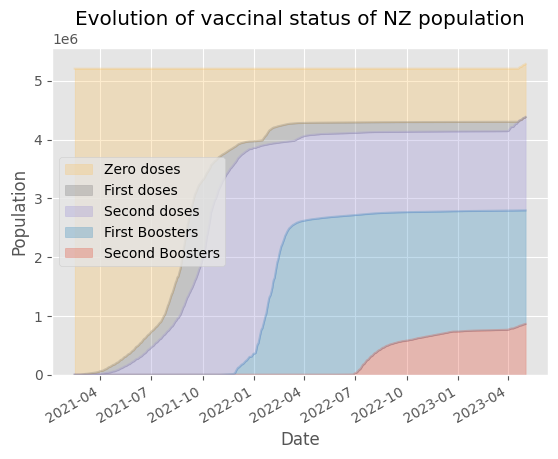

In [11]:
fig, ax = plt.subplots()
df_vax_pop[df_vax_pop.columns[::-1]].plot(
    kind="area", alpha=0.3, stacked=True, legend="reverse", ax=ax
)
ax.set_ylabel("Population")
ax.set_title("Evolution of vaccinal status of NZ population")

In [43]:
df_vax_pop2 = df_vax_pop.copy()
df_vax_pop2.columns = np.arange(0, 5)
df_vax_pop2.columns.name = "Last COVID-19 dose number"

In [41]:
df_vax_pop2.head()

Last COVID-19 dose number,0,1,2,3,4
Date,,,,,
2021-02-14,5205618,1,0,0,0
2021-02-15,5205617,2,0,0,0
2021-02-17,5205616,3,0,0,0
2021-02-19,5205587,32,0,0,0
2021-02-20,5205522,97,0,0,0


In [44]:
df_vax_pop2.unstack().to_xarray().to_netcdf("data/ds_population_vaccinal_status.nc")

## Vaccination status by age group

In [14]:
import os
import re

list_file = os.listdir("data/nz-covid-data/vaccine-data")
list_file = [
    file
    for file in list_file[1:]
    if len(re.findall(r"[0-9]{4}", file)) == 1 and not "_" in file
]

In [15]:
list_file

['2021-09-07',
 '2021-09-14',
 '2021-09-21',
 '2021-09-28',
 '2021-10-05',
 '2021-10-12',
 '2021-10-19',
 '2021-10-26',
 '2021-11-03',
 '2021-11-10',
 '2021-11-17',
 '2021-11-24',
 '2021-12-01',
 '2021-12-08',
 '2021-12-15',
 '2021-12-22',
 '2021-12-29',
 '2022-01-05',
 '2022-01-12',
 '2022-02-16',
 '2022-02-23',
 '2022-03-02',
 '2022-03-09',
 '2022-03-16',
 '2022-03-23',
 '2022-03-30',
 '2022-04-06',
 '2022-04-13',
 '2022-04-20',
 '2022-04-27',
 '2022-05-04',
 '2022-05-11',
 '2022-05-18',
 '2022-05-25',
 '2022-06-01',
 '2022-06-08',
 '2022-06-15',
 '2022-06-22',
 '2022-06-29',
 '2022-07-06',
 '2022-07-13',
 '2022-07-20',
 '2022-07-27',
 '2022-08-03',
 '2022-08-10',
 '2022-08-17',
 '2022-08-24',
 '2022-08-31',
 '2022-09-07',
 '2022-09-14',
 '2022-09-21',
 '2022-09-28',
 '2022-10-05',
 '2022-11-02',
 '2022-12-07',
 '2023-01-11',
 '2023-02-01',
 '2023-03-01',
 '2023-04-05',
 '2023-05-03']

In [16]:
def load_vaccination_status_statistics(file):
    # Load file
    df = pd.read_csv(
        f"data/nz-covid-data/vaccine-data/{file}/dhb_residence_uptake.csv",
        thousands=",",
    )
    # Assume random between 0 and <5 for small number
    df = df.replace("<5", np.mean(np.arange(5)))
    # Remove useless columns
    df = df[
        [
            col
            for col in df.columns
            if not "per 1000 people" in col
            and not "Eligible" in col
            and not "Unnamed" in col
        ]
    ]

    # Convert columns that should be numeric
    list_columns_that_should_be_number = [
        "Population",
        "First dose administered",
        "Second dose administered",
        "Booster 1 Received",
        "Booster 2 Received",
        "Booster Received",
        "At least partially vaccinated",
        "Completed primary course",
        "Fully vaccinated",
    ]
    list_columns_to_convert = set(df.columns).intersection(
        list_columns_that_should_be_number
    )
    for col in list_columns_to_convert:
        # print(col)
        df[col] = df[col].apply(lambda x: float(str(x).replace(",", "")))
        df[col] = pd.to_numeric(df[col])

    # Pivot the dataframe
    list_columns_non_numerical = list(df.columns[df.dtypes != float])
    list_columns_numerical = list(df.columns[df.dtypes == float])

    # Create the final xarray
    ds = df.pivot_table(
        index=list_columns_non_numerical,
        values=list_columns_numerical,
    ).to_xarray()
    return ds

In [17]:
list_ds = []
list_date = [date for date in list_file]
for file in list_file:
    # print(file)
    ds = load_vaccination_status_statistics(file)
    list_ds.append(ds)
ds_vaccinal_status = xr.concat(list_ds, dim="Date")
ds_vaccinal_status = ds_vaccinal_status.assign_coords(
    {"Date": pd.to_datetime(list_date)}
)

<Axes: xlabel='Date'>

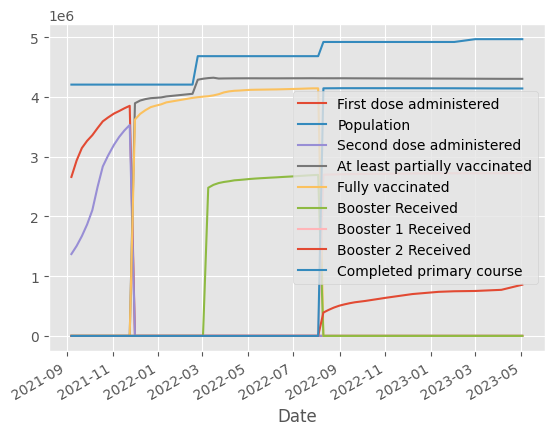

In [18]:
ds_vaccinal_status.sum(
    dim=["DHB of residence", "Ethnic group", "Age group", "Gender"]
).to_dataframe().plot()

In [19]:
ds_vaccinal_status["4+ doses"] = ds_vaccinal_status["Booster 2 Received"]
ds_vaccinal_status["3+ doses"] = ds_vaccinal_status["Booster Received"].fillna(
    0
) + ds_vaccinal_status["Booster 1 Received"].fillna(0)
ds_vaccinal_status["2+ doses"] = (
    ds_vaccinal_status["Second dose administered"].fillna(0)
    + ds_vaccinal_status["Fully vaccinated"].fillna(0)
    + ds_vaccinal_status["Completed primary course"].fillna(0)
)
ds_vaccinal_status["1+ doses"] = ds_vaccinal_status["First dose administered"].fillna(
    0
) + ds_vaccinal_status["At least partially vaccinated"].fillna(0)
ds_vaccinal_status["0 dose"] = (
    ds_vaccinal_status["Population"] - ds_vaccinal_status["1+ doses"]
)

In [20]:
ds_vaccinal_status["1 dose"] = (
    ds_vaccinal_status["1+ doses"] - ds_vaccinal_status["2+ doses"]
)
ds_vaccinal_status["2 doses"] = (
    ds_vaccinal_status["2+ doses"] - ds_vaccinal_status["3+ doses"]
)
ds_vaccinal_status["3 doses"] = ds_vaccinal_status["3+ doses"] - ds_vaccinal_status[
    "4+ doses"
].fillna(0)

In [21]:
ds_vaccinal_status

<xarray.Dataset>
Dimensions:                        (DHB of residence: 24, Ethnic group: 6,
                                    Age group: 21, Gender: 4, Date: 60)
Coordinates:
  * DHB of residence               (DHB of residence) object 'Auckland' ... '...
  * Ethnic group                   (Ethnic group) object 'Asian' ... 'Various'
  * Age group                      (Age group) object '12-15' ... 'Various'
  * Gender                         (Gender) object 'Female' 'Male' ... 'Various'
  * Date                           (Date) datetime64[ns] 2021-09-07 ... 2023-...
Data variables: (12/17)
    First dose administered        (Date, DHB of residence, Ethnic group, Age group, Gender) float64 ...
    Population                     (Date, DHB of residence, Ethnic group, Age group, Gender) float64 ...
    Second dose administered       (Date, DHB of residence, Ethnic group, Age group, Gender) float64 ...
    At least partially vaccinated  (Date, DHB of residence, Ethnic group, Age group, Gender) float64 ...
    Fully vaccinated               (Date, DHB of residence, Ethnic group, Age group, Gender) float64 ...
    Booster Received               (Date, DHB of residence, Ethnic group, Age group, Gender) float64 ...
    ...                             ...
    2+ doses                       (Date, DHB of residence, Ethnic group, Age group, Gender) float64 ...
    1+ doses                       (Date, DHB of residence, Ethnic group, Age group, Gender) float64 ...
    0 dose                         (Date, DHB of residence, Ethnic group, Age group, Gender) float64 ...
    1 dose                         (Date, DHB of residence, Ethnic group, Age group, Gender) float64 ...
    2 doses                        (Date, DHB of residence, Ethnic group, Age group, Gender) float64 ...
    3 doses                        (Date, DHB of residence, Ethnic group, Age group, Gender) float64 ...

<Axes: xlabel='Date'>

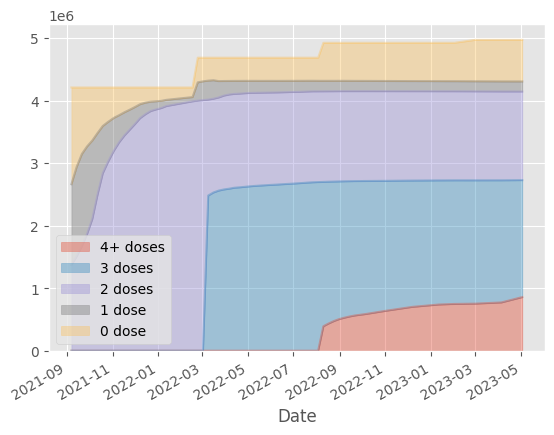

In [22]:
ds_vaccinal_status.sum(
    dim=["DHB of residence", "Ethnic group", "Age group", "Gender"]
).to_dataframe()[["4+ doses", "3 doses", "2 doses", "1 dose", "0 dose"]].plot(
    kind="area", alpha=0.4, stacked=True
)

In [23]:
list_n_doses = ["0 dose", "1 dose", "2 doses", "3 doses", "4+ doses"]

ds = ds_vaccinal_status[list_n_doses]
ds = xr.concat([ds[n_dose] for n_dose in list_n_doses], dim="N_dose")
ds.name = "value"
ds = ds.assign_coords({"N_dose": ["0", "1", "2", "3", "4+"]})

In [24]:
ds.to_netcdf("data/ds_population_vaccinal_status_categories.nc")

# Calculation

## Absolute mortality data

In [25]:
ds_count = xr.open_dataset("data/ds_count.nc")

# Reorder age categories
list_age_categories = list(ds_count["Age at death"].values)
print(list_age_categories)
functions.grouping.sort_age_categories(list_age_categories)

ds_count = ds_count.sel({"Age at death": list_age_categories})

ds_count

['0 to 20', '100+', '21 to 40', '41 to 60', '61 to 80', '81 to 100']


<xarray.Dataset>
Dimensions:                                  (Month of Death: 54,
                                              Age at death: 6,
                                              Last COVID-19 dose number: 9,
                                              Days between last vaccination and death: 6)
Coordinates:
  * Month of Death                           (Month of Death) datetime64[ns] ...
  * Age at death                             (Age at death) <U9 '0 to 20' ......
  * Last COVID-19 dose number                (Last COVID-19 dose number) int64 ...
  * Days between last vaccination and death  (Days between last vaccination and death) <U16 ...
Data variables:
    Count                                    (Month of Death, Age at death, Last COVID-19 dose number, Days between last vaccination and death) float64 ...

In [26]:
# Group multi vaccinated together to limit the number of categories
ds_count_grouped = functions.grouping.group_over_n_dose(
    ds_count, group_over_n_dose=1, doses_label="Last COVID-19 dose number"
)

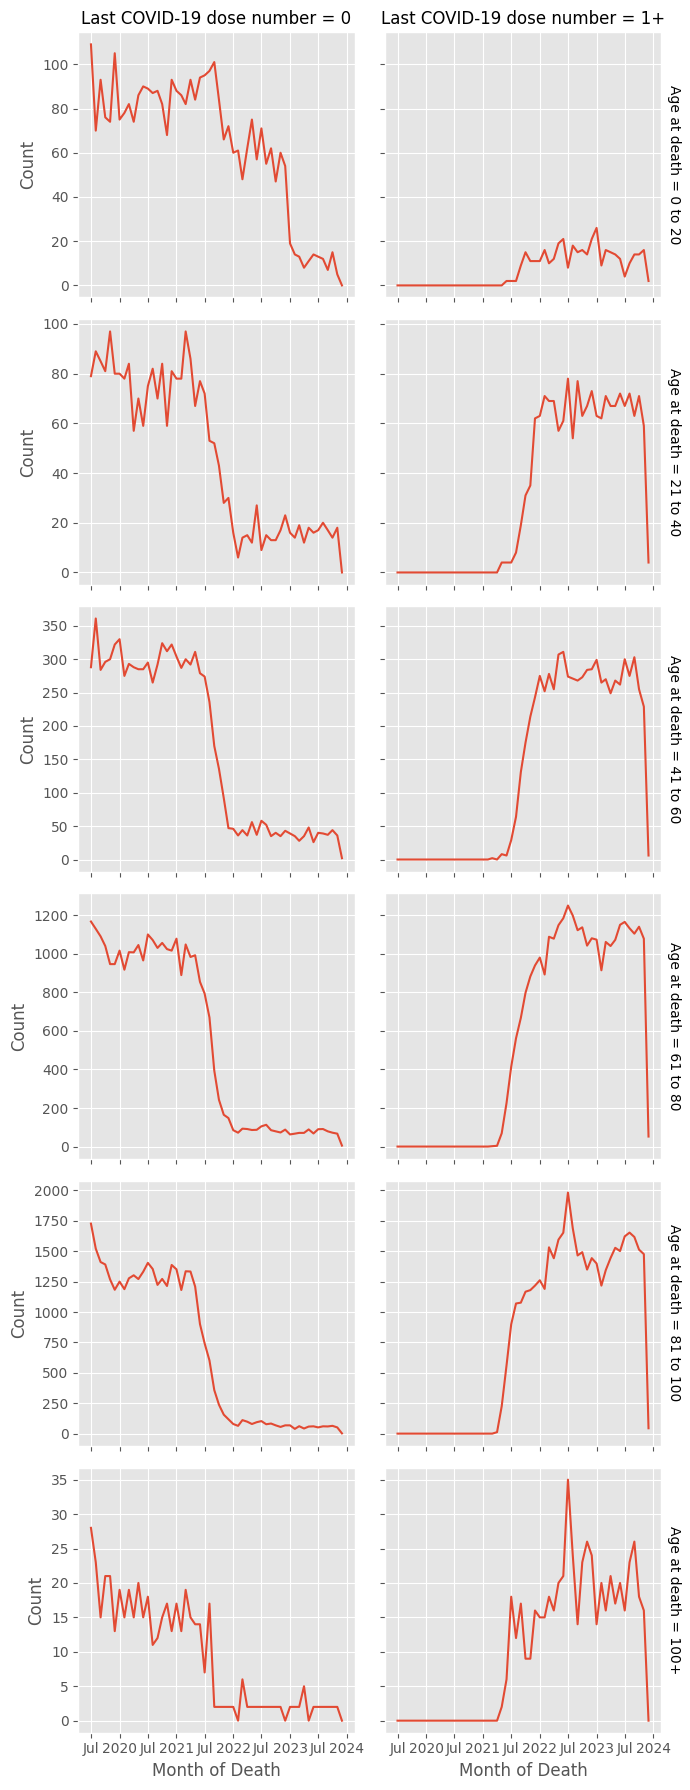

In [32]:
ds_count_grouped.sum(dim="Days between last vaccination and death").Count.plot(
    col="Last COVID-19 dose number",
    row="Age at death",
    x="Month of Death",
    sharey="row",
)

In [28]:
dfp = (
    ds_count_grouped.sum(dim="Days between last vaccination and death")
    .to_dataframe()
    .unstack([1, 2])
)

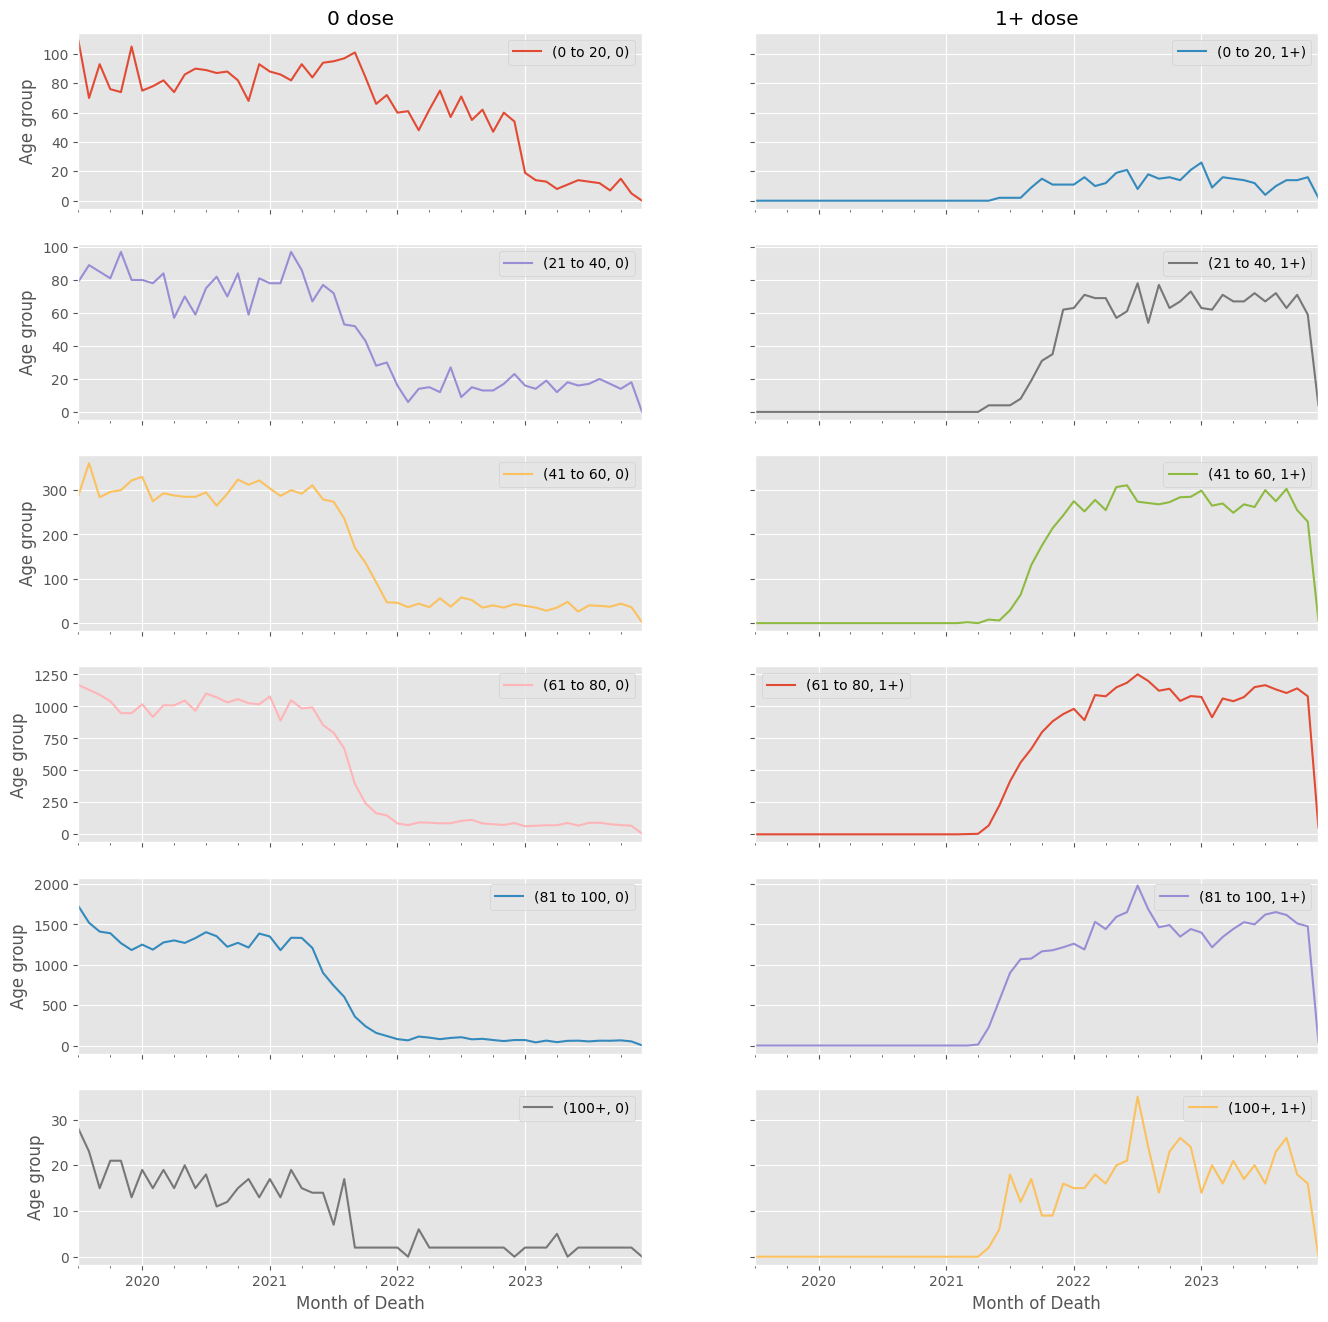

In [31]:
fig, ax = plt.subplots(
    ds_count_grouped["Age at death"].size,
    ds_count_grouped["Last COVID-19 dose number"].size,
    figsize=(16, 16),
    sharex=True,
    sharey="row",
)
dfp.Count.plot(ax=ax, subplots=True, legend=True)
ax[0][0].set_title("0 dose")
ax[0][1].set_title("1+ dose")

for axi in ax:
    axi[0].set_ylabel("Age group")

## Relative mortality data

In [45]:
ds_count = xr.open_dataset("data/ds_count.nc")

# Reorder age categories
list_age_categories = list(ds_count["Age at death"].values)
print(list_age_categories)
functions.grouping.sort_age_categories(list_age_categories)

ds_count = ds_count.sel({"Age at death": list_age_categories})
ds_count

['0 to 20', '100+', '21 to 40', '41 to 60', '61 to 80', '81 to 100']


<xarray.Dataset>
Dimensions:                                  (Month of Death: 54,
                                              Age at death: 6,
                                              Last COVID-19 dose number: 9,
                                              Days between last vaccination and death: 6)
Coordinates:
  * Month of Death                           (Month of Death) datetime64[ns] ...
  * Age at death                             (Age at death) <U9 '0 to 20' ......
  * Last COVID-19 dose number                (Last COVID-19 dose number) int64 ...
  * Days between last vaccination and death  (Days between last vaccination and death) <U16 ...
Data variables:
    Count                                    (Month of Death, Age at death, Last COVID-19 dose number, Days between last vaccination and death) float64 ...

In [46]:
ds_vaccinal_status = xr.open_dataarray("data/ds_population_vaccinal_status.nc")
ds_vaccinal_status = ds_vaccinal_status.resample(Date="MS").first()
ds_vaccinal_status = ds_vaccinal_status.rename({"Date": "Month of Death"})
ds_vaccinal_status

<xarray.DataArray (Last COVID-19 dose number: 5, Month of Death: 28)>
array([[5.205618e+06, 5.197488e+06, 5.142243e+06, 5.000250e+06,
        4.770955e+06, 4.473092e+06, 4.008041e+06, 2.842638e+06,
        1.896573e+06, 1.492193e+06, 1.307093e+06, 1.234322e+06,
        1.024587e+06, 9.439920e+05, 9.219720e+05, 9.182160e+05,
        9.157340e+05, 9.135130e+05, 9.108630e+05, 9.093260e+05,
        9.083830e+05, 9.075290e+05, 9.066910e+05, 9.058210e+05,
        9.050010e+05, 9.045930e+05, 9.041150e+05, 9.033070e+05],
       [1.000000e+00, 8.130000e+03, 4.653900e+04, 1.293290e+05,
        1.972800e+05, 2.661640e+05, 4.474930e+05, 1.118472e+06,
        1.342328e+06, 5.263390e+05, 2.600560e+05, 1.147830e+05,
        2.525550e+05, 2.970030e+05, 2.243200e+05, 1.938550e+05,
        1.865850e+05, 1.780920e+05, 1.685430e+05, 1.659190e+05,
        1.644300e+05, 1.631300e+05, 1.621260e+05, 1.613040e+05,
        1.607430e+05, 1.605210e+05, 1.518280e+05, 0.000000e+00],
       [0.000000e+00, 1.000000e+00, 1.683700e+04, 7.604000e+04,
        2.373790e+05, 4.663500e+05, 7.500640e+05, 1.244433e+06,
        1.966490e+06, 3.185241e+06, 3.552052e+06, 3.497550e+06,
        2.525997e+06, 1.539104e+06, 1.436344e+06, 1.429396e+06,
        1.410397e+06, 1.397280e+06, 1.383488e+06, 1.373044e+06,
        1.367521e+06, 1.364370e+06, 1.360274e+06, 1.356553e+06,
        1.354120e+06, 1.352740e+06, 1.359371e+06, 1.580335e+06],
       [0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        5.000000e+00, 1.300000e+01, 2.100000e+01, 7.600000e+01,
        2.280000e+02, 1.843000e+03, 8.639500e+04, 3.588850e+05,
        1.402379e+06, 2.425342e+06, 2.622373e+06, 2.663021e+06,
        2.691011e+06, 2.687958e+06, 2.416880e+06, 2.244488e+06,
        2.184590e+06, 2.130921e+06, 2.081748e+06, 2.045901e+06,
        2.034446e+06, 2.030794e+06, 2.022306e+06, 1.935010e+06],
       [0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 3.000000e+00, 2.300000e+01, 7.900000e+01,
        1.010000e+02, 1.780000e+02, 6.100000e+02, 1.131000e+03,
        1.892000e+03, 2.877600e+04, 3.258450e+05, 5.128420e+05,
        5.806950e+05, 6.396690e+05, 6.947800e+05, 7.360400e+05,
        7.513090e+05, 7.569710e+05, 7.679990e+05, 8.609310e+05]])
Coordinates:
  * Last COVID-19 dose number  (Last COVID-19 dose number) int64 0 1 2 3 4
  * Month of Death             (Month of Death) datetime64[ns] 2021-02-01 ......

In [47]:
# Group multi vaccinated together to limit the number of categories
n_dose_max = 4
ds_count_grouped = functions.grouping.group_over_n_dose(
    ds_count, group_over_n_dose=n_dose_max, doses_label="Last COVID-19 dose number"
)
ds_vaccinal_status_grouped = functions.grouping.group_over_n_dose(
    ds_vaccinal_status,
    group_over_n_dose=n_dose_max,
    doses_label="Last COVID-19 dose number",
)

In [49]:
ds_relative_mortality = (
    ds_count_grouped.sum(
        dim=["Days between last vaccination and death", "Age at death"]
    )
    / ds_vaccinal_status_grouped
)
ds_relative_mortality

<xarray.Dataset>
Dimensions:                    (Month of Death: 28, Last COVID-19 dose number: 5)
Coordinates:
  * Month of Death             (Month of Death) datetime64[ns] 2021-02-01 ......
  * Last COVID-19 dose number  (Last COVID-19 dose number) <U11 '0' '1' ... '4+'
Data variables:
    Count                      (Last COVID-19 dose number, Month of Death) float64 ...

In [50]:
dfp = ds_relative_mortality.Count.to_dataset("Last COVID-19 dose number").to_dataframe()
dfp.head()

,0,1,2,3,4+
Month of Death,,,,,
2021-02-01,0.000487,0.000000,NaN,NaN,NaN
2021-03-01,0.000554,0.000492,0.000000,NaN,NaN
2021-04-01,0.000545,0.000301,0.000119,NaN,NaN
2021-05-01,0.000536,0.002010,0.000631,NaN,NaN
2021-06-01,0.000465,0.002296,0.001483,0.0,NaN


(0.0, 0.0016634959041752478)

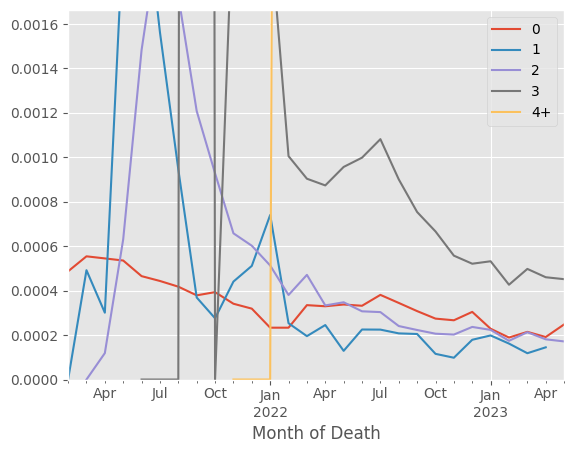

In [51]:
fig, ax = plt.subplots()
dfp.plot(ax=ax)
ax.set_ylim([0, dfp["0"].max() * 3])

## By age group

In [52]:
ds_count = xr.open_dataset("data/ds_count.nc")

# Reorder age categories
list_age_categories = list(ds_count["Age at death"].values)
print(list_age_categories)
functions.grouping.sort_age_categories(list_age_categories)

ds_count = ds_count.sel({"Age at death": list_age_categories})

ds_count

['0 to 20', '100+', '21 to 40', '41 to 60', '61 to 80', '81 to 100']


<xarray.Dataset>
Dimensions:                                  (Month of Death: 54,
                                              Age at death: 6,
                                              Last COVID-19 dose number: 9,
                                              Days between last vaccination and death: 6)
Coordinates:
  * Month of Death                           (Month of Death) datetime64[ns] ...
  * Age at death                             (Age at death) <U9 '0 to 20' ......
  * Last COVID-19 dose number                (Last COVID-19 dose number) int64 ...
  * Days between last vaccination and death  (Days between last vaccination and death) <U16 ...
Data variables:
    Count                                    (Month of Death, Age at death, Last COVID-19 dose number, Days between last vaccination and death) float64 ...

In [53]:
# Group multi vaccinated together to limit the number of categories
ds_count_grouped = functions.grouping.group_over_n_dose(
    ds_count, group_over_n_dose=4, doses_label="Last COVID-19 dose number"
)
ds_count_grouped = (
    ds_count_grouped.rename({"Month of Death": "Date", "Age at death": "Age_group"})
    .sum(dim="Days between last vaccination and death")
    .sel(Age_group=["21 to 40", "41 to 60", "61 to 80"])
)
ds_count_grouped

<xarray.Dataset>
Dimensions:                    (Date: 54, Age_group: 3,
                                Last COVID-19 dose number: 5)
Coordinates:
  * Date                       (Date) datetime64[ns] 2019-07-01 ... 2023-12-01
  * Age_group                  (Age_group) <U9 '21 to 40' '41 to 60' '61 to 80'
  * Last COVID-19 dose number  (Last COVID-19 dose number) <U11 '0' '1' ... '4+'
Data variables:
    Count                      (Last COVID-19 dose number, Date, Age_group) float64 ...

In [54]:
ds_vaccinal_status = xr.open_dataset("data/ds_population_vaccinal_status_categories.nc")
ds_vaccinal_status = ds_vaccinal_status.sum(
    dim=["DHB of residence", "Ethnic group", "Gender"]
)
ds_vaccinal_status = ds_vaccinal_status.rename({"N_dose": "Last COVID-19 dose number"})
ds_vaccinal_status = ds_vaccinal_status.resample(Date="MS").first()
ds_vaccinal_status

<xarray.Dataset>
Dimensions:                    (Age group: 21, Last COVID-19 dose number: 5,
                                Date: 21)
Coordinates:
  * Age group                  (Age group) <U7 '12-15' '12-17' ... 'Various'
  * Last COVID-19 dose number  (Last COVID-19 dose number) <U2 '0' '1' ... '4+'
  * Date                       (Date) datetime64[ns] 2021-09-01 ... 2023-05-01
Data variables:
    value                      (Date, Last COVID-19 dose number, Age group) float64 ...

In [55]:
ds_vaccinal_status_grouped = functions.grouping.group_age_groups(
    ds=ds_vaccinal_status, label="Age group"
)
ds_vaccinal_status_grouped = ds_vaccinal_status_grouped.sum(dim="Sub_Age_group")
ds_vaccinal_status_grouped

<xarray.Dataset>
Dimensions:                    (Last COVID-19 dose number: 5, Date: 21,
                                Age_group: 3)
Coordinates:
  * Last COVID-19 dose number  (Last COVID-19 dose number) <U2 '0' '1' ... '4+'
  * Date                       (Date) datetime64[ns] 2021-09-01 ... 2023-05-01
  * Age_group                  (Age_group) <U8 '21 to 40' '41 to 60' '61 to 80'
Data variables:
    value                      (Age_group, Date, Last COVID-19 dose number) float64 ...

In [56]:
ds = ds_count_grouped.Count / ds_vaccinal_status_grouped.value
ds

<xarray.DataArray (Last COVID-19 dose number: 5, Date: 21, Age_group: 3)>
array([[[7.51828606e-05, 4.08394673e-04, 3.00942546e-03],
        [1.14016318e-04, 6.07310952e-04, 3.16773344e-03],
        [1.36847713e-04, 6.52283346e-04, 3.29894434e-03],
        [2.51218409e-04, 4.51389222e-04, 3.76341352e-03],
        [2.15877813e-04, 5.50673977e-04, 2.61594805e-03],
        [1.50924412e-04, 4.62998688e-04, 4.26894344e-03],
        [3.81845952e-04, 1.42887298e-04, 6.30209392e-03],
        [4.48752468e-04, 1.23308786e-04, 4.61273317e-03],
        [3.67028598e-04, 1.92978345e-04, 4.28116288e-03],
        [8.43908233e-04, 1.28010407e-04, 4.13340935e-03],
        [2.90069939e-04, 2.01306409e-04, 4.72653612e-03],
        [4.94266509e-04, 1.79496650e-04, 4.66383260e-03],
        [1.04937723e-04, 1.02619434e-04, 1.88528590e-03],
        [1.05349314e-04, 1.16308485e-04, 1.83836362e-03],
        [1.37928796e-04, 1.00984163e-04, 1.78205253e-03],
        [1.87139451e-04, 1.22848719e-04, 2.29987194e-03],
        [1.30223170e-04, 1.10474388e-04, 1.77200236e-03],
        [1.14368807e-04, 9.85671158e-05, 1.98854361e-03],
        [1.42040145e-04, 7.62683010e-05, 1.55011680e-03],
        [8.98842740e-05, 9.46119827e-05, 1.65100921e-03],
...
        [           nan,            nan,            nan],
        [           nan,            nan,            nan],
        [           nan,            nan,            nan],
        [           nan,            nan,            nan],
        [           nan,            nan,            inf],
        [           nan,            inf,            inf],
        [           inf,            inf,            inf],
        [           nan,            inf,            inf],
        [           inf,            inf,            inf],
        [           inf,            inf,            inf],
        [           inf,            inf,            inf],
        [7.13966979e-04, 4.26209650e-04, 1.07473417e-03],
        [6.03545832e-04, 5.41141228e-04, 1.26839667e-03],
        [1.32687587e-04, 4.55142683e-04, 1.15799209e-03],
        [2.29634307e-04, 4.60516217e-04, 1.27362258e-03],
        [1.04981366e-04, 3.61944497e-04, 1.20323074e-03],
        [3.07188204e-04, 3.85460432e-04, 1.10676266e-03],
        [3.02663438e-04, 3.18530174e-04, 1.21403010e-03],
        [3.44041629e-04, 3.59077354e-04, 1.24533837e-03],
        [9.90663001e-05, 4.05506884e-04, 1.31187096e-03]]])
Coordinates:
  * Date                       (Date) datetime64[ns] 2021-09-01 ... 2023-05-01
  * Age_group                  (Age_group) <U9 '21 to 40' '41 to 60' '61 to 80'
  * Last COVID-19 dose number  (Last COVID-19 dose number) <U11 '0' '1' ... '4+'

21 to 40


C:\Users\romai\AppData\Local\Temp\ipykernel_25672\538003377.py:7: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  .drop("Age_group")
C:\Users\romai\AppData\Local\Temp\ipykernel_25672\538003377.py:15: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  .drop("Age_group")
C:\Users\romai\AppData\Local\Temp\ipykernel_25672\538003377.py:23: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  .drop("Age_group")
C:\Users\romai\AppData\Local\Temp\ipykernel_25672\538003377.py:7: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  .drop("Age_group")
C:\Users\romai\AppData\Local\Temp\ipykernel_25672\538003377.py:15: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  .drop("Age_group")
C:\Users\romai\AppData\Local\Temp\ipykernel_25672\538003377.py:23: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  .

41 to 60
61 to 80


C:\Users\romai\AppData\Local\Temp\ipykernel_25672\538003377.py:15: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  .drop("Age_group")
C:\Users\romai\AppData\Local\Temp\ipykernel_25672\538003377.py:23: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  .drop("Age_group")


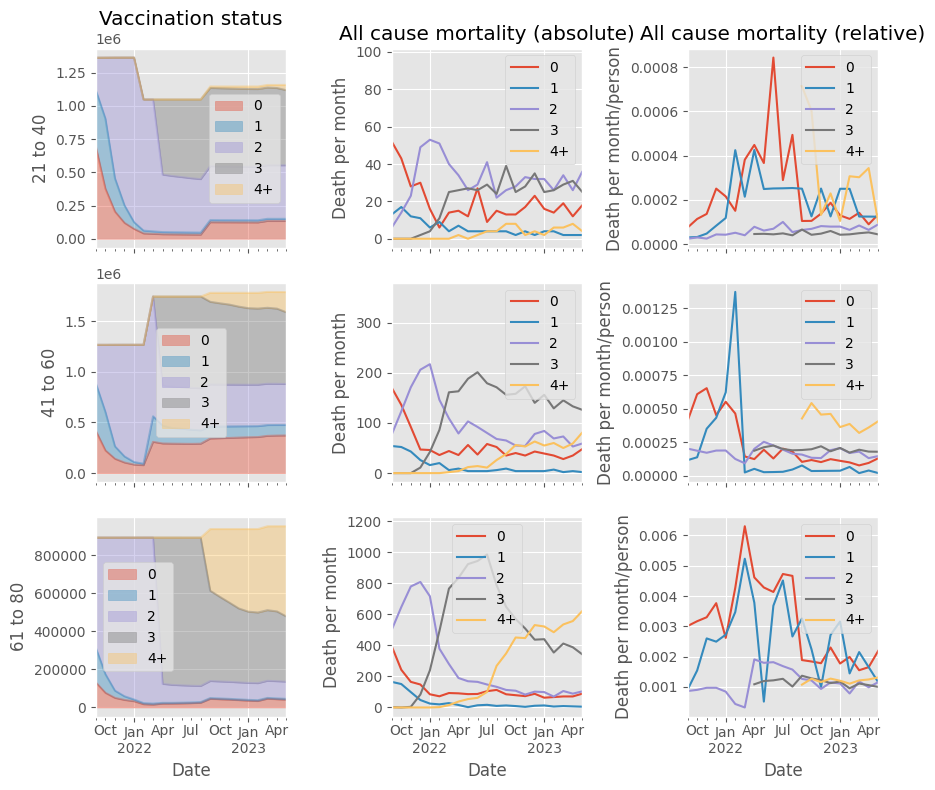

In [57]:
fig, ax = plt.subplots(3, 3, sharex=True, figsize=(9, 8))
for i, age_group in enumerate(ds.Age_group.values):
    print(age_group)

    dfp = (
        ds_vaccinal_status_grouped.sel(Age_group=age_group)
        .drop("Age_group")
        .value.to_dataset("Last COVID-19 dose number")
        .to_dataframe()
    )
    dfp.plot(ax=ax[i][0], kind="area", stacked=True, alpha=0.4)

    dfp = (
        ds_count_grouped.sel(Age_group=age_group)
        .drop("Age_group")
        .Count.to_dataset("Last COVID-19 dose number")
        .to_dataframe()
    )
    dfp.plot(ax=ax[i][1])

    dfp = (
        ds.sel(Age_group=age_group)
        .drop("Age_group")
        .to_dataset("Last COVID-19 dose number")
        .to_dataframe()
    )
    dfp.plot(
        ax=ax[i][-1],
    )
    ax[i][0].set_ylabel(age_group)
    ax[i][1].set_ylabel("Death per month")
    ax[i][2].set_ylabel("Death per month/person")

ax[0][0].set_title("Vaccination status")
ax[0][1].set_title("All cause mortality (absolute)")
ax[0][2].set_title("All cause mortality (relative)")
plt.tight_layout()

# Analysing distance between death and vaccination

In [58]:
ds_count = xr.open_dataset("data/ds_count.nc")

# Reorder age categories
list_age_categories = list(ds_count["Age at death"].values)
functions.grouping.sort_age_categories(list_age_categories)
ds_count = ds_count.sel({"Age at death": list_age_categories})
ds_count

<xarray.Dataset>
Dimensions:                                  (Month of Death: 54,
                                              Age at death: 6,
                                              Last COVID-19 dose number: 9,
                                              Days between last vaccination and death: 6)
Coordinates:
  * Month of Death                           (Month of Death) datetime64[ns] ...
  * Age at death                             (Age at death) <U9 '0 to 20' ......
  * Last COVID-19 dose number                (Last COVID-19 dose number) int64 ...
  * Days between last vaccination and death  (Days between last vaccination and death) <U16 ...
Data variables:
    Count                                    (Month of Death, Age at death, Last COVID-19 dose number, Days between last vaccination and death) float64 ...

In [61]:
# Group multi vaccinated together to limit the number of categories
ds_count_grouped = functions.grouping.group_over_n_dose(
    ds_count, group_over_n_dose=4, doses_label="Last COVID-19 dose number"
)
ds_count_grouped

<xarray.Dataset>
Dimensions:                                  (Month of Death: 54,
                                              Age at death: 6,
                                              Days between last vaccination and death: 6,
                                              Last COVID-19 dose number: 5)
Coordinates:
  * Month of Death                           (Month of Death) datetime64[ns] ...
  * Age at death                             (Age at death) <U9 '0 to 20' ......
  * Days between last vaccination and death  (Days between last vaccination and death) <U16 ...
  * Last COVID-19 dose number                (Last COVID-19 dose number) <U11 ...
Data variables:
    Count                                    (Last COVID-19 dose number, Month of Death, Age at death, Days between last vaccination and death) float64 ...

In [62]:
ds_vaccinal_status = xr.open_dataset("data/ds_population_vaccinal_status_categories.nc")
ds_vaccinal_status = ds_vaccinal_status.sum(
    dim=["DHB of residence", "Ethnic group", "Gender"]
)
ds_vaccinal_status = ds_vaccinal_status.rename({"N_dose": "Last COVID-19 dose number"})
ds_vaccinal_status = ds_vaccinal_status.resample(Date="MS").first()
ds_vaccinal_status

<xarray.Dataset>
Dimensions:                    (Age group: 21, Last COVID-19 dose number: 5,
                                Date: 21)
Coordinates:
  * Age group                  (Age group) <U7 '12-15' '12-17' ... 'Various'
  * Last COVID-19 dose number  (Last COVID-19 dose number) <U2 '0' '1' ... '4+'
  * Date                       (Date) datetime64[ns] 2021-09-01 ... 2023-05-01
Data variables:
    value                      (Date, Last COVID-19 dose number, Age group) float64 ...

In [63]:
ds_vaccinal_status_grouped = functions.grouping.group_age_groups(
    ds=ds_vaccinal_status, label="Age group"
)
ds_vaccinal_status_grouped = ds_vaccinal_status_grouped.sum(dim="Sub_Age_group")
ds_vaccinal_status_grouped

<xarray.Dataset>
Dimensions:                    (Last COVID-19 dose number: 5, Date: 21,
                                Age_group: 3)
Coordinates:
  * Last COVID-19 dose number  (Last COVID-19 dose number) <U2 '0' '1' ... '4+'
  * Date                       (Date) datetime64[ns] 2021-09-01 ... 2023-05-01
  * Age_group                  (Age_group) <U8 '21 to 40' '41 to 60' '61 to 80'
Data variables:
    value                      (Age_group, Date, Last COVID-19 dose number) float64 ...

In [72]:
ds = (
    ds_count_grouped.rename({"Age at death": "Age_group", "Month of Death": "Date"})
    .sum(dim="Age_group")
    .Count
    / ds_vaccinal_status_grouped.sum(dim="Age_group").value
)
ds = ds.rename({"Days between last vaccination and death": "Distance vax-death"})
ds = ds.sel(
    {
        "Distance vax-death": [
            "Never vaccinated",
            "<= 30",
            "<= 90",
            "<= 180",
            "<= 365",
            "366 +",
        ]
    }
)
ds

<xarray.DataArray (Last COVID-19 dose number: 5, Date: 21, Distance vax-death: 6)>
array([[[8.69366573e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00],
        [1.10063914e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00],
        [1.28643856e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00],
        [1.58635356e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00],
        [1.51464950e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00],
        [1.77860465e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00],
        [8.79350839e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00],
        [8.80893875e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00],
        [9.03866508e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00],
        [8.88678412e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00],
...
        [           nan,            inf,            inf,            inf,
                    inf,            nan],
        [0.00000000e+00, 4.57370262e-04, 1.53478372e-03, 1.32024406e-04,
         6.83697815e-05, 0.00000000e+00],
        [0.00000000e+00, 2.79479237e-04, 1.54137034e-03, 6.79642690e-04,
         1.41856885e-04, 0.00000000e+00],
        [0.00000000e+00, 1.62308490e-04, 7.90287769e-04, 1.47236988e-03,
         9.27477088e-05, 0.00000000e+00],
        [0.00000000e+00, 9.10455000e-05, 4.79739750e-04, 1.88744325e-03,
         1.52326125e-04, 0.00000000e+00],
        [0.00000000e+00, 2.81066067e-05, 3.32319291e-04, 1.40202368e-03,
         6.36531975e-04, 0.00000000e+00],
        [0.00000000e+00, 1.14117100e-05, 1.63024429e-04, 8.23273368e-04,
         1.20964126e-03, 6.52097717e-06],
        [0.00000000e+00, 1.61949614e-05, 7.93553110e-05, 5.05282796e-04,
         1.73771936e-03, 2.75314344e-05],
        [0.00000000e+00, 1.73274462e-04, 5.35575610e-05, 3.92230373e-04,
         1.90916953e-03, 5.19823386e-05],
        [0.00000000e+00, 4.64817384e-04, 2.99611205e-04, 1.75006545e-04,
         1.54425776e-03, 4.90018327e-05]]])
Coordinates:
  * Date                       (Date) datetime64[ns] 2021-09-01 ... 2023-05-01
  * Distance vax-death         (Distance vax-death) <U16 'Never vaccinated' ....
  * Last COVID-19 dose number  (Last COVID-19 dose number) <U11 '0' '1' ... '4+'

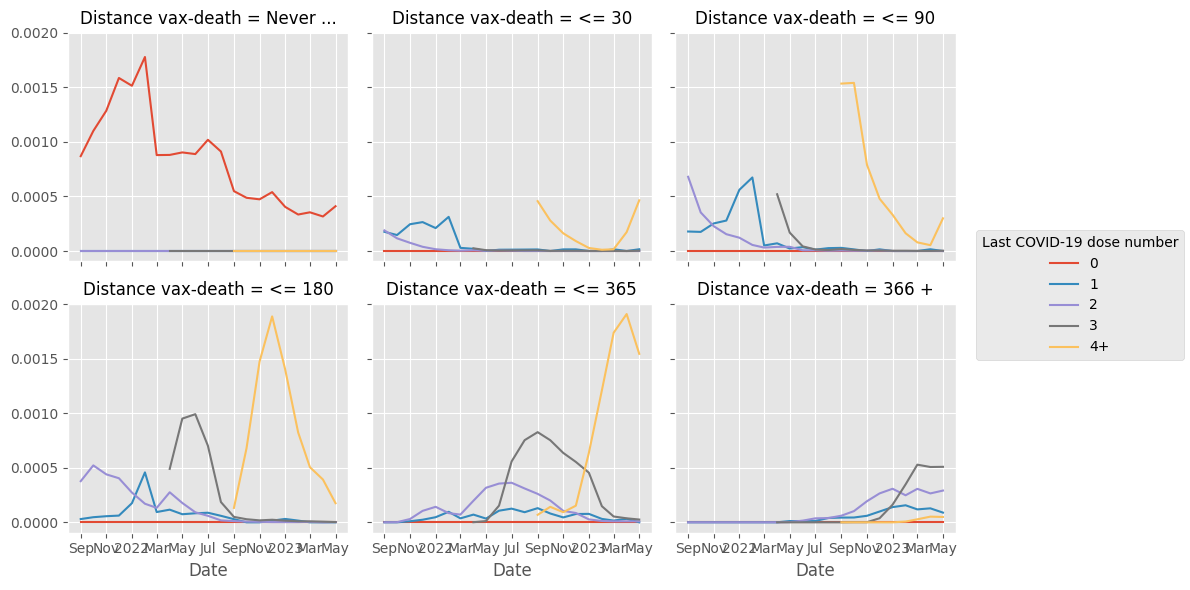

In [73]:
ds.plot(hue="Last COVID-19 dose number", col="Distance vax-death", col_wrap=3)

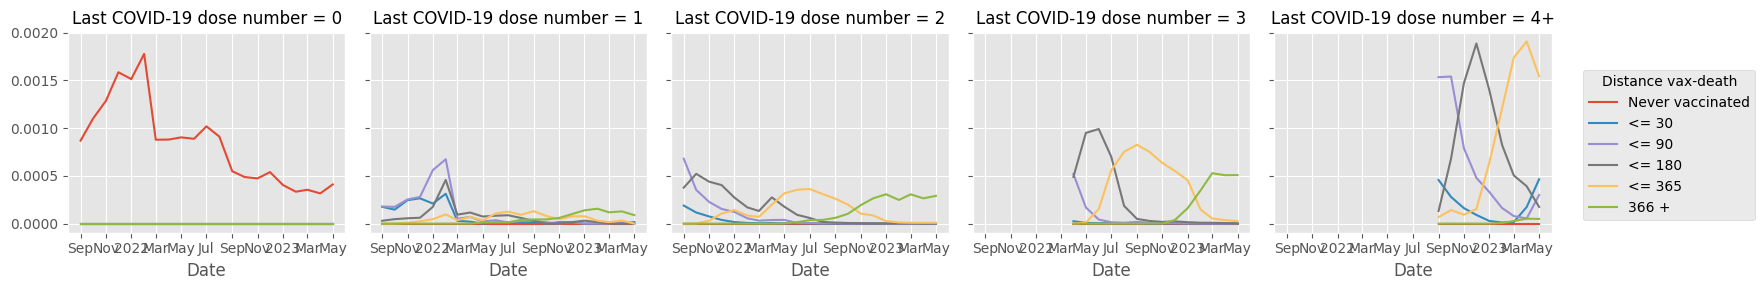

In [75]:
ds.plot(col="Last COVID-19 dose number", hue="Distance vax-death")

In [76]:
list_df = []
for days_from_vax in ["<= 30", "<= 90", "<= 180", "<= 365"]:
    print(days_from_vax)

<= 30
<= 90
<= 180
<= 365


In [77]:
ds2 = xr.concat(
    [
        ds.sel({"Distance vax-death": days_from_vax}).drop("Distance vax-death")
        / int(re.findall(r"\d+", days_from_vax)[0])
        for days_from_vax in ["<= 30", "<= 90", "<= 180", "<= 365"]
    ],
    dim="Distance vax-death",
)
ds2 = ds2.assign_coords(
    coords={
        "Distance vax-death": [
            "<= 30",
            "<= 90",
            "<= 180",
            "<= 365",
        ]
    }
)
ds2

C:\Users\romai\AppData\Local\Temp\ipykernel_25672\1470786630.py:3: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  ds.sel({"Distance vax-death": days_from_vax}).drop(


<xarray.DataArray (Distance vax-death: 4, Last COVID-19 dose number: 5, Date: 21)>
array([[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00],
        [5.86687229e-06, 4.88027879e-06, 8.18608511e-06, 8.83553906e-06,
         7.00983714e-06, 1.04352293e-05, 9.64809770e-07, 6.72286986e-07,
         0.00000000e+00, 3.94253363e-07, 4.17980693e-07, 4.40972521e-07,
         4.80854767e-07, 0.00000000e+00, 4.97991848e-07, 5.07445494e-07,
         0.00000000e+00, 0.00000000e+00, 5.26301939e-07, 0.00000000e+00,
         5.38938292e-07],
        [6.29826773e-06, 3.88058040e-06, 2.50541335e-06, 1.29078088e-06,
         5.44305715e-07, 2.30978050e-07, 1.09401745e-07, 2.15833316e-07,
         7.20647487e-08, 1.45686213e-07, 7.34443297e-08, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00],
        [           inf,            nan,            inf,            inf,
                    inf,            inf,            inf, 8.28806917e-07,
...
         2.11949748e-07, 8.55415895e-08, 4.32576937e-08, 8.77084212e-08,
         0.00000000e+00],
        [0.00000000e+00, 2.98085807e-09, 8.27735273e-08, 2.87705978e-07,
         3.89131457e-07, 2.30526038e-07, 1.94225564e-07, 5.41061601e-07,
         8.67738550e-07, 9.72904505e-07, 9.93007582e-07, 8.49902047e-07,
         7.14268503e-07, 5.47290271e-07, 2.87742760e-07, 2.33831870e-07,
         7.30080118e-08, 3.34843870e-08, 2.43616197e-08, 2.43875609e-08,
         2.44339151e-08],
        [           nan,            nan,            nan,            nan,
                    nan,            nan,            inf, 2.47713151e-09,
         3.05965315e-08, 4.19007491e-07, 1.52914672e-06, 2.06312529e-06,
         2.26409421e-06, 2.06220735e-06, 1.74238044e-06, 1.51677769e-06,
         1.24616733e-06, 4.04221163e-07, 1.46179378e-07, 1.00497993e-07,
         6.95867230e-08],
        [           nan,            nan,            nan,            nan,
                    nan,            nan,            nan,            nan,
                    nan,            nan,            inf,            inf,
         1.87314470e-07, 3.88649001e-07, 2.54103312e-07, 4.17331849e-07,
         1.74392322e-06, 3.31408566e-06, 4.76087496e-06, 5.23060144e-06,
         4.23084317e-06]]])
Coordinates:
  * Date                       (Date) datetime64[ns] 2021-09-01 ... 2023-05-01
  * Last COVID-19 dose number  (Last COVID-19 dose number) <U11 '0' '1' ... '4+'
  * Distance vax-death         (Distance vax-death) <U6 '<= 30' ... '<= 365'

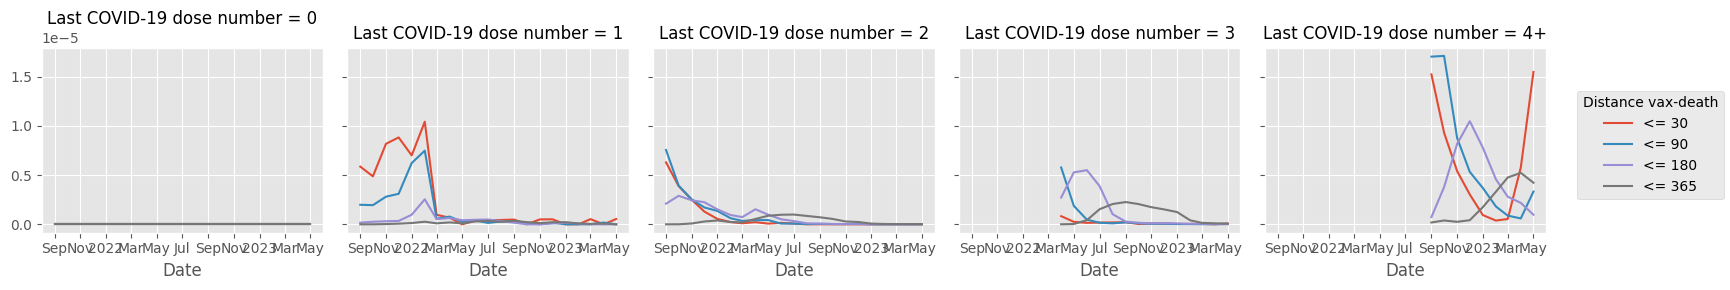

In [79]:
ds2.plot(col="Last COVID-19 dose number", hue="Distance vax-death")

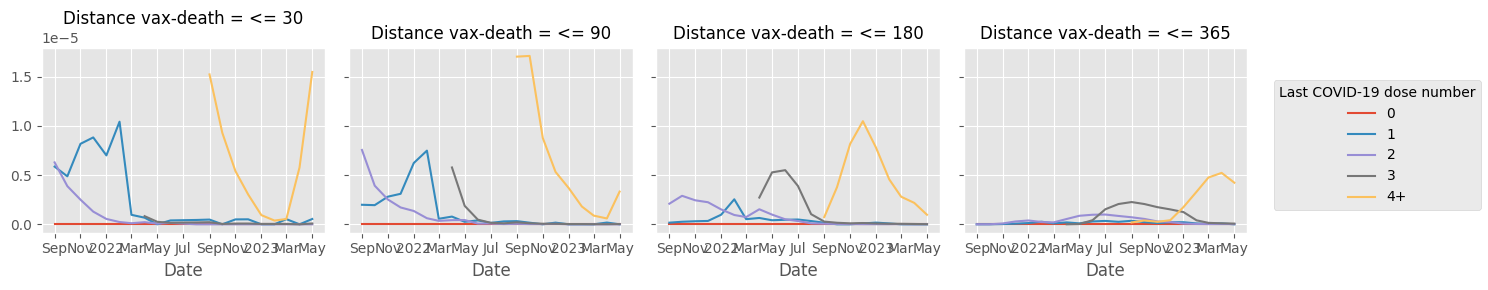

In [80]:
ds2.plot(hue="Last COVID-19 dose number", col="Distance vax-death")

## Per age group

In [81]:
ds = (
    ds_count_grouped.rename(
        {"Age at death": "Age_group", "Month of Death": "Date"}
    ).Count
    / ds_vaccinal_status_grouped.value
)
ds = ds.rename({"Days between last vaccination and death": "Distance vax-death"})
ds = ds.sel(
    {
        "Distance vax-death": [
            "Never vaccinated",
            "<= 30",
            "<= 90",
            "<= 180",
            "<= 365",
            "366 +",
        ]
    }
)
ds

<xarray.DataArray (Last COVID-19 dose number: 5, Date: 21, Age_group: 3,
                   Distance vax-death: 6)>
array([[[[7.51828606e-05,            nan,            nan,
                     nan,            nan,            nan],
         [4.08394673e-04,            nan,            nan,
                     nan,            nan,            nan],
         [3.00942546e-03,            nan,            nan,
                     nan,            nan,            nan]],

        [[1.14016318e-04,            nan,            nan,
                     nan,            nan,            nan],
         [6.07310952e-04,            nan,            nan,
                     nan,            nan,            nan],
         [3.16773344e-03,            nan,            nan,
                     nan,            nan,            nan]],

        [[1.36847713e-04,            nan,            nan,
                     nan,            nan,            nan],
         [6.52283346e-04,            nan,            nan,
                     nan,            nan,            nan],
         [3.29894434e-03,            nan,            nan,
                     nan,            nan,            nan]],
...
        [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
          1.00887813e-04, 2.01775626e-04, 0.00000000e+00],
         [0.00000000e+00, 2.54824139e-05, 1.27412070e-05,
          8.91884488e-05, 1.78376898e-04, 1.27412070e-05],
         [0.00000000e+00, 4.53843029e-06, 4.53843029e-05,
          2.26921515e-04, 9.07686059e-04, 2.94997969e-05]],

        [[0.00000000e+00, 0.00000000e+00, 8.60104073e-05,
          0.00000000e+00, 1.72020815e-04, 8.60104073e-05],
         [0.00000000e+00, 2.43442274e-05, 1.21721137e-05,
          9.12908527e-05, 1.94753819e-04, 3.65163411e-05],
         [0.00000000e+00, 7.37812676e-05, 2.23579599e-05,
          1.54269923e-04, 9.43505907e-04, 5.14233077e-05]],

        [[0.00000000e+00, 4.95331501e-05, 0.00000000e+00,
          0.00000000e+00, 4.95331501e-05, 0.00000000e+00],
         [0.00000000e+00, 6.00750939e-05, 4.00500626e-05,
          7.00876095e-05, 1.95244055e-04, 4.00500626e-05],
         [0.00000000e+00, 2.17239081e-04, 1.49747328e-04,
          1.09674099e-04, 7.93028102e-04, 4.21823458e-05]]]])
Coordinates:
  * Date                       (Date) datetime64[ns] 2021-09-01 ... 2023-05-01
  * Age_group                  (Age_group) <U9 '21 to 40' '41 to 60' '61 to 80'
  * Distance vax-death         (Distance vax-death) <U16 'Never vaccinated' ....
  * Last COVID-19 dose number  (Last COVID-19 dose number) <U11 '0' '1' ... '4+'

In [82]:
ds2 = xr.concat(
    [
        ds.sel({"Distance vax-death": days_from_vax}).drop("Distance vax-death")
        / int(re.findall(r"\d+", days_from_vax)[0])
        for days_from_vax in ["<= 30", "<= 90", "<= 180", "<= 365"]
    ],
    dim="Distance vax-death",
)
ds2 = ds2.assign_coords(
    coords={
        "Distance vax-death": [
            "<= 30",
            "<= 90",
            "<= 180",
            "<= 365",
        ]
    }
)
ds2

C:\Users\romai\AppData\Local\Temp\ipykernel_25672\1072470756.py:3: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  ds.sel({"Distance vax-death": days_from_vax}).drop("Distance vax-death")


<xarray.DataArray (Distance vax-death: 4, Last COVID-19 dose number: 5,
                   Date: 21, Age_group: 3)>
array([[[[           nan,            nan,            nan],
         [           nan,            nan,            nan],
         [           nan,            nan,            nan],
         ...,
         [           nan,            nan,            nan],
         [           nan,            nan,            nan],
         [           nan,            nan,            nan]],

        [[8.62962362e-07, 2.49465253e-06, 1.47113450e-05],
         [5.06733860e-07, 1.84290062e-06, 2.14375402e-05],
         [1.33209182e-06, 5.69295456e-06, 3.15167433e-05],
         ...,
         [           nan,            nan,            nan],
         [           nan,            nan,            nan],
         [           nan,            nan,            nan]],

        [[2.72119950e-07, 3.22956818e-06, 6.09402389e-06],
         [1.45334473e-07, 2.26534431e-06, 4.08912432e-06],
         [4.03880632e-07, 1.23044548e-06, 3.44148297e-06],
         ...,
...
         ...,
         [1.36167932e-08, 1.34466401e-08, 6.10279114e-08],
         [           nan,            nan, 6.07713864e-08],
         [1.36185192e-08, 1.35388715e-08, 6.09159660e-08]],

        [[           nan,            nan,            nan],
         [           nan,            nan,            nan],
         [           nan,            nan,            nan],
         ...,
         [9.37294549e-09, 6.20899427e-08, 2.36430409e-07],
         [9.42587913e-09, 4.79871389e-08, 1.64375343e-07],
         [9.70534264e-09, 7.74689995e-09, 1.20045132e-07]],

        [[           nan,            nan,            nan],
         [           nan,            nan,            nan],
         [           nan,            nan,            nan],
         ...,
         [5.52809933e-07, 4.88703829e-07, 2.48681112e-06],
         [4.71289903e-07, 5.33572107e-07, 2.58494769e-06],
         [1.35707260e-07, 5.34915219e-07, 2.17267973e-06]]]])
Coordinates:
  * Date                       (Date) datetime64[ns] 2021-09-01 ... 2023-05-01
  * Age_group                  (Age_group) <U9 '21 to 40' '41 to 60' '61 to 80'
  * Last COVID-19 dose number  (Last COVID-19 dose number) <U11 '0' '1' ... '4+'
  * Distance vax-death         (Distance vax-death) <U6 '<= 30' ... '<= 365'

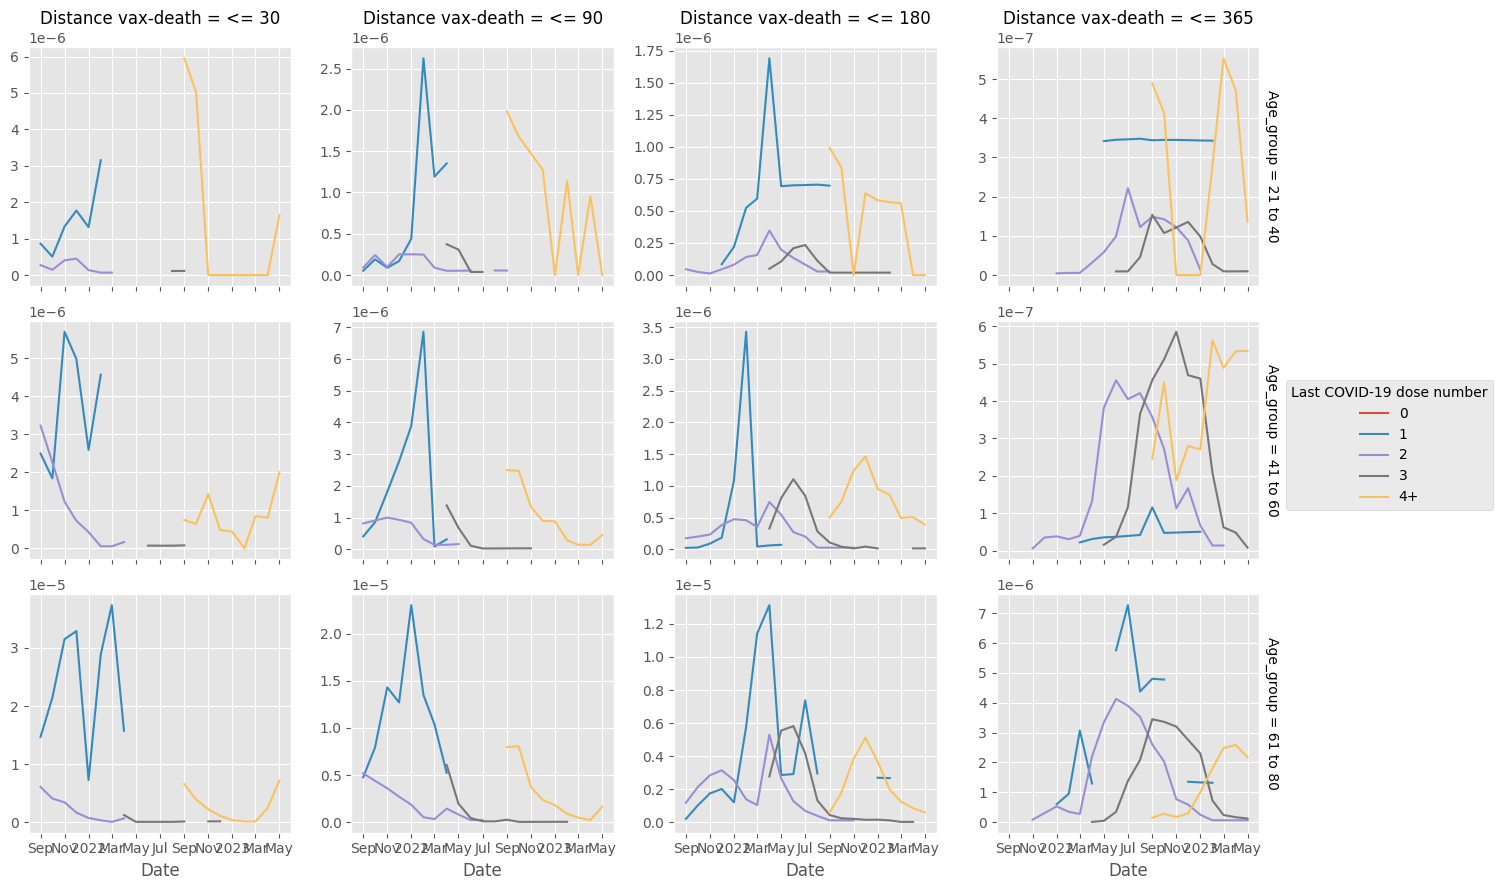

In [85]:
ds2.plot(
    row="Age_group",
    hue="Last COVID-19 dose number",
    col="Distance vax-death",
    sharey=False,
)